In [2]:
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import regularizers
from pathlib import Path
from tensorflow import keras
from livelossplot.inputs.keras import PlotLossesCallback
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import pickle
from numpy import expand_dims

In [3]:
batch_size = 2
#train= tf.keras.preprocessing.image.ImageDataGenerator(shear_range=0.2, 
#                                                       zoom_range=0.2, 
#                                                       horizontal_flip=True,
#                                                       fill_mode="nearest",
#                                                       rotation_range=25,
#                                                       preprocessing_function=preprocess_input)

train= tf.keras.preprocessing.image.ImageDataGenerator(shear_range=0.2, 
                                                       rotation_range=25, 
                                                       width_shift_range=0.5, 
                                                       height_shift_range=0.5,
                                                       zoom_range=0.2,
                                                       horizontal_flip=True, 
                                                       vertical_flip=True,
                                                       fill_mode="nearest",
                                                       preprocessing_function=preprocess_input)


test= tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

In [3]:
traingen = train.flow_from_directory(directory="train",
                                        target_size=(224,224), 
                                        class_mode='categorical',
                                        shuffle= True,
                                        )

Found 6005 images belonging to 102 classes.


In [4]:
validgen = test.flow_from_directory(directory="val", 
                                   target_size=(224,224), 
                                   class_mode='categorical',
                                    shuffle= True,
                                    )

Found 1019 images belonging to 102 classes.


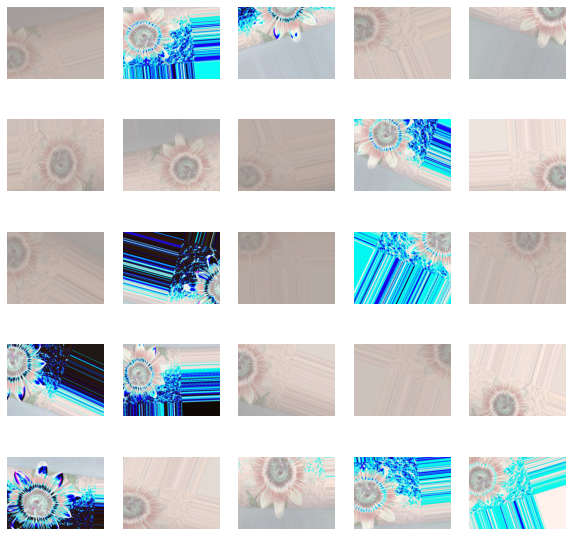

In [5]:
pic = load_img("image_00070.jpg")
data = img_to_array(pic)
samples = expand_dims(data, 0)
it = train.flow(samples, batch_size=1)
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
    plt.axis("off")
    plt.savefig('plt_image/augmentation_set3.png')

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(directory="seg_train/train",
                                        image_size=(224,224), 
                                        
                                        shuffle= True,
                                        )

Found 5190 files belonging to 102 classes.


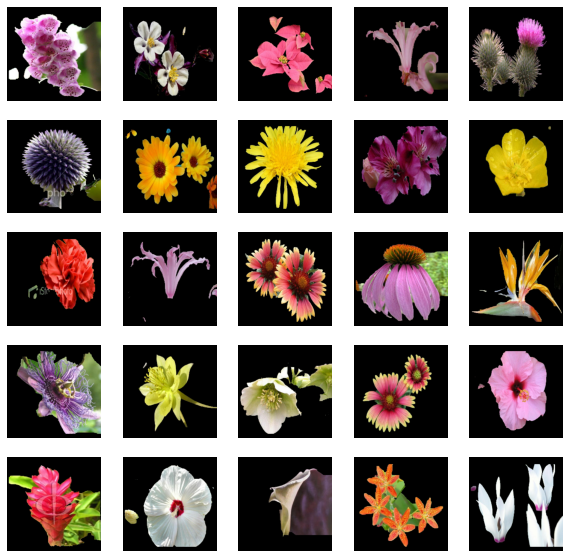

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.savefig('plt_image/102seg_images.png')